# Problem №2 

In [121]:
import pandas as pnd
from matplotlib import pyplot
import numpy as np
german_data = pnd.read_csv('german.csv')

In [122]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [123]:
german_data

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [124]:
import pydotplus

In [125]:
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [126]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(german_data.iloc[:, 1:], german_data['Creditability'])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [127]:
dot_data = tree.export_graphviz(model, out_file="tree.out",  
                         filled=True, rounded=True,  
                         special_characters=True)

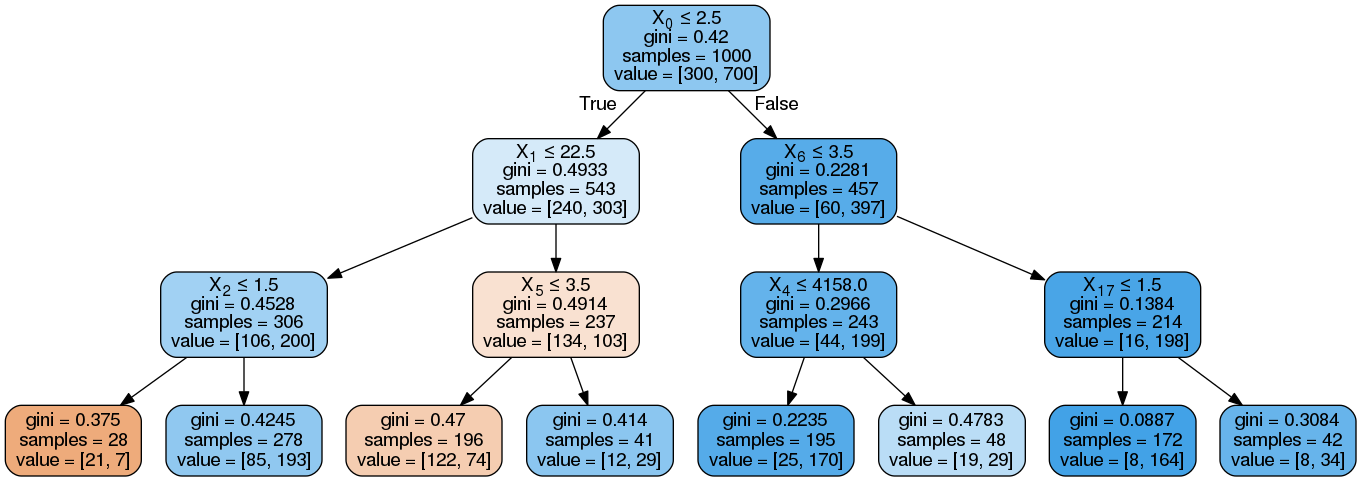

In [128]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

In [129]:
train_data, test_data, train_target, test_target = train_test_split(german_data.iloc[:, 1:], 
                                                                    german_data['Creditability'], 
                                                                    test_size = 0.2)

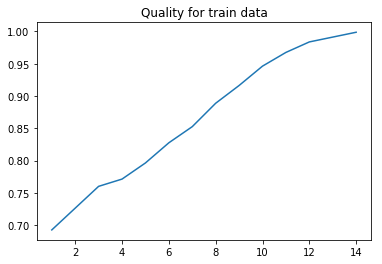

In [130]:
quality = []

for i in range(1, 15):
    model = tree.DecisionTreeClassifier(max_depth = i)
    model.fit(train_data, train_target)
    train_predictions = model.predict(train_data)
    quality.append(accuracy_score(train_target, train_predictions))
    

pyplot.plot(range(1, 15), quality)
pyplot.title('Quality for train data')
pyplot.show()


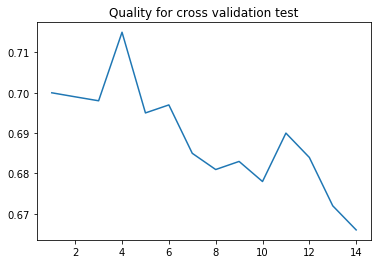

In [131]:
quality = []

for i in range(1, 15, 1):
    result = numpy.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth = i), 
                     german_data.iloc[:, 1:], german_data['Creditability']))
    quality.append(result)

pyplot.plot(range(1, 15, 1), quality)
pyplot.title('Quality for cross validation test')
pyplot.show()